Дано: статистика (лист DATA) по динамике доходов трех регионов за период с января 2017 по июнь 2022 год в разрезе направлений звонков" 
Цель:
- подготовить прогноз по доходам каждого из регионов до конца 2022 г и на 2023г. (с детализацией по месяцам).
- подготовить аналитическую справку с короткими выводами о текущих трендах, предположениях закладываемых в прогноз Для достижения поставленной цели, предусматривается решить следующие задачи:
- Проанализировать данные, любым удобным для Вас способом;
- Составить прогноз до конца 2022 г и на 2023г. (с детализацией по месяцам).
- Графически визуализировать резултаты\ по возможности оформить в виде дашборда;
- Описать логику и приложить вычисления


Необходимо сдеоать прогноз по доходам трех регионов с детализацией по месяцам. Для прогноза будем использовать библиотеку Для построения прогноза буду использовать библиотеку Facebook Prophet.

In [119]:
import pandas as pd
import numpy as np
from datetime import date
from fbprophet import Prophet
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
pd.set_option("display.float_format", "{:.2f}".format)

In [120]:
#загрузка файла
mts = pd.read_excel(io='C:\\Users\\jaco\Desktop\\mts.xlsx',
                    engine='openpyxl',
                    sheet_name='DATA')
mts.head()

,Номер BFR_,MM.YYYY,account,раб,вых,прзд,Общий итог
0,регион 3,2017-01-01,направление 1,2633362.40,1496451.49,269749.83,4399563.71
1,регион 3,2017-01-01,направление 2,12799722.38,6860953.50,1208849.19,20869525.06
2,регион 3,2017-01-01,направление 3,2220023.72,1516424.90,391191.74,4127640.36
3,регион 3,2017-01-01,направление 4,9428471.31,5765688.92,1793303.56,16987463.79
4,регион 3,2017-02-01,направление 1,2804676.22,1137137.08,165635.84,4107449.13


In [121]:
#небольшое преобразование датафрейма для более удобной работы с ним
mts = mts.rename(columns={'MM.YYYY': 'date',
                          'Номер BFR_': 'region',
                          'раб': 'work_days',
                          'вых': 'weekend',
                          'прзд': 'holidays',
                          'Общий итог': 'total_revenue'})
mts.head()

,region,date,account,work_days,weekend,holidays,total_revenue
0,регион 3,2017-01-01,направление 1,2633362.40,1496451.49,269749.83,4399563.71
1,регион 3,2017-01-01,направление 2,12799722.38,6860953.50,1208849.19,20869525.06
2,регион 3,2017-01-01,направление 3,2220023.72,1516424.90,391191.74,4127640.36
3,регион 3,2017-01-01,направление 4,9428471.31,5765688.92,1793303.56,16987463.79
4,регион 3,2017-02-01,направление 1,2804676.22,1137137.08,165635.84,4107449.13


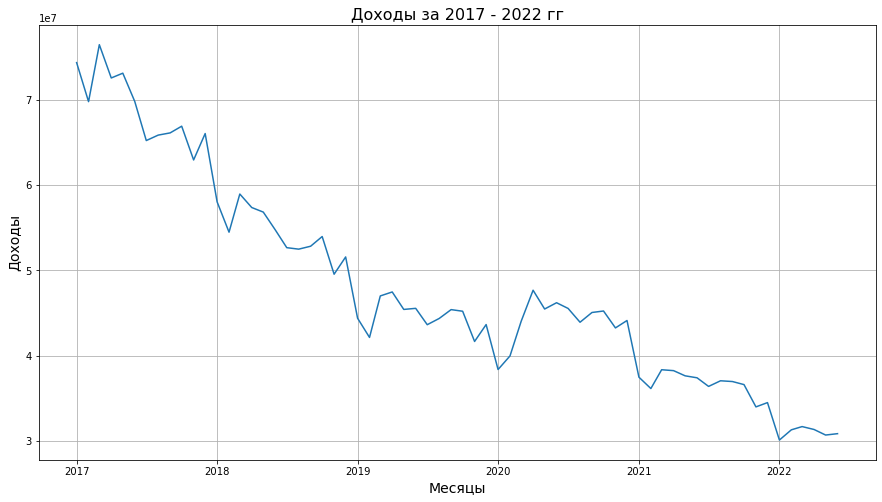

In [122]:
plt.figure(figsize = (15,8))

plt.title('Доходы за 2017 - 2022 гг', fontsize = 16)
plt.xlabel('Месяцы', fontsize = 14)
plt.ylabel('Доходы', fontsize = 14)
plt.grid()

plt.plot(mts.groupby('date')['total_revenue'].sum())
plt.show()

Разделим датасет на 3 части, так как прогноз необходим по каждому региону

In [123]:
region_1 = mts.query('region == "регион 1"').groupby('date').agg({'total_revenue': 'sum'})
region_2 = mts.query('region == "регион 2"').groupby('date').agg({'total_revenue': 'sum'})
region_3 = mts.query('region == "регион 3"').groupby('date').agg({'total_revenue': 'sum'})
region_1.head()

,total_revenue
date,
2017-01-01,22208504.28
2017-02-01,20689818.89
2017-03-01,22996864.86
2017-04-01,21919867.85
2017-05-01,22531977.79


Посмотрим на данные

Применим тест Дики - Фуллера. Нулевая гипотеза: данные не стационарны.

In [124]:
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [125]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

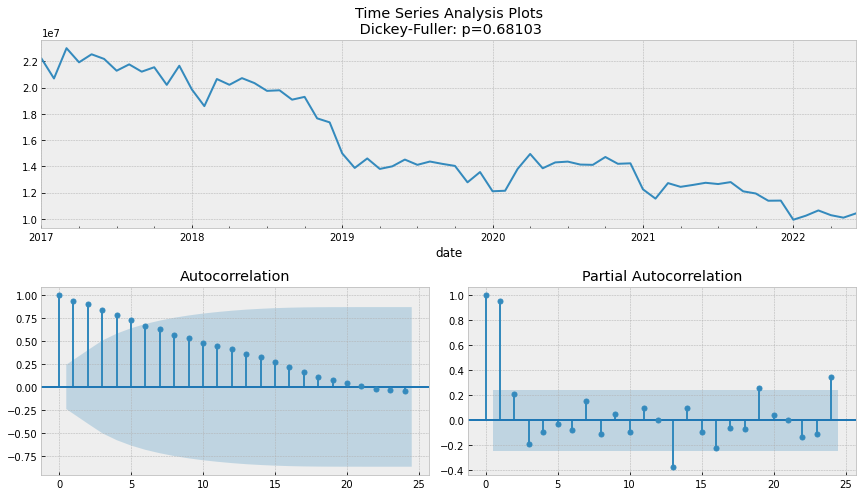

In [126]:
tsplot(region_1.total_revenue, lags=24)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



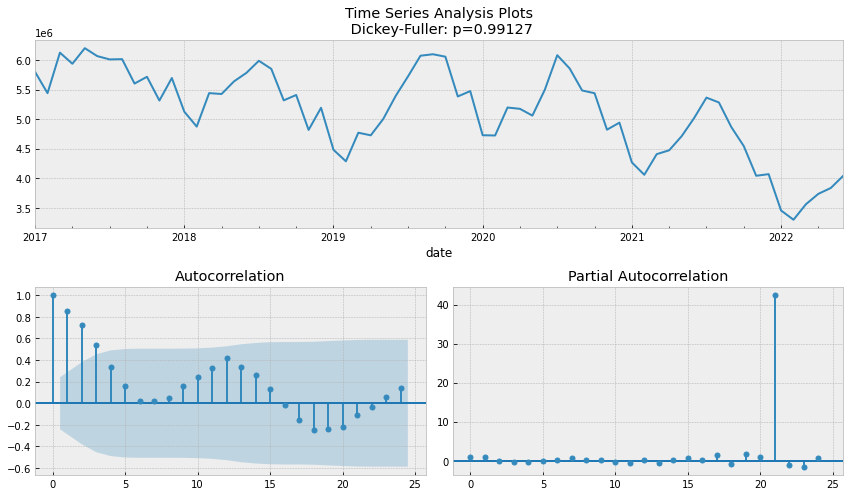

In [127]:
tsplot(region_2.total_revenue, lags=24)

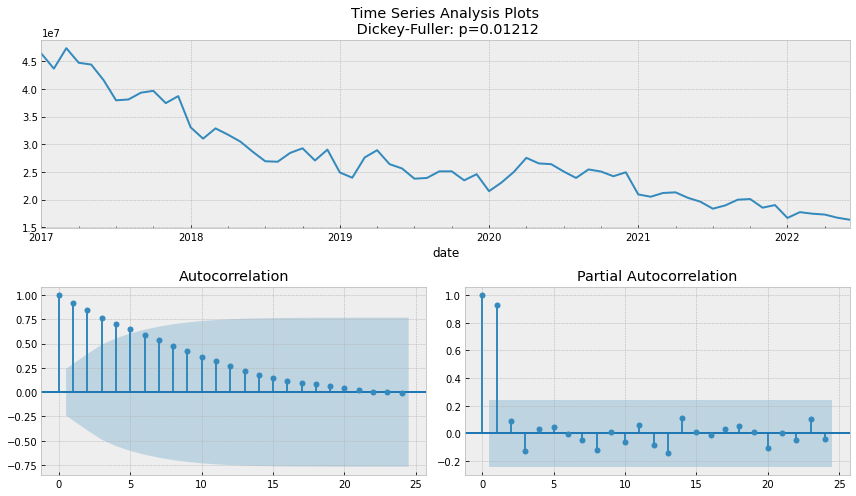

In [128]:
tsplot(region_3.total_revenue, lags=24)

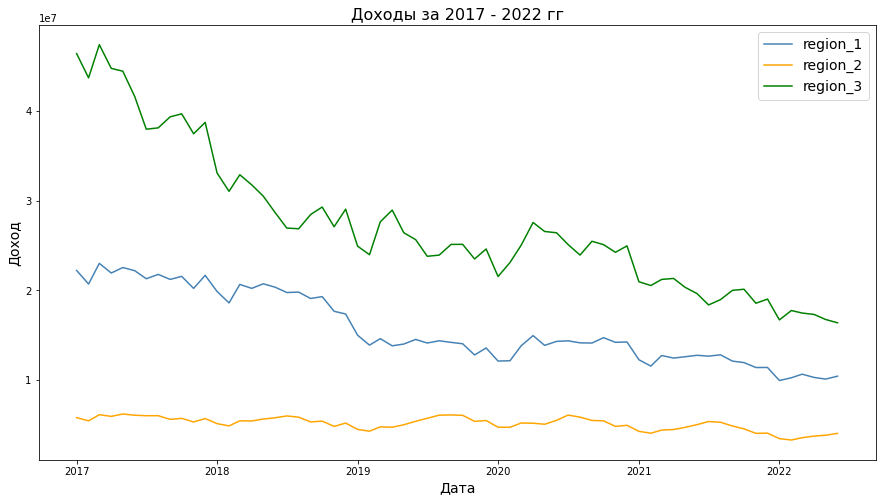

In [129]:
plt.figure(figsize = (15,8))

plt.plot(region_1, label = 'region_1', color = 'steelblue')
plt.plot(region_2, label = 'region_2', color = 'orange')
plt.plot(region_3, label = 'region_3', color = 'green')

plt.legend(fontsize = 14)

plt.xlabel('Дата', fontsize = 14)
plt.ylabel('Доход', fontsize = 14)
plt.title('Доходы за 2017 - 2022 гг', fontsize = 16)

plt.show()

Сначала обучим и проверим модель на имеющихся данных (7 месяцев, 12.2021 - 06.2022), посмотрим на ошибки модели 

In [130]:
mts_new = mts.groupby(['date','region' ]).agg({'total_revenue': 'sum'}).reset_index()
mts_new.head()

,date,region,total_revenue
0,2017-01-01,регион 1,22208504.28
1,2017-01-01,регион 2,5798564.37
2,2017-01-01,регион 3,46384192.92
3,2017-02-01,регион 1,20689818.89
4,2017-02-01,регион 2,5438733.22


In [131]:
# Отрезаем из обучающей выборки последние 7 точек, чтобы измерить на них качество (берем 7 месяцев)
train = mts_new.loc[mts_new['date'] < '2021-12-01']
test = mts_new.loc[mts_new['date'] >= '2021-12-01']
train.shape, test.shape

((177, 3), (21, 3))

In [132]:
region_1 = region_1.reset_index().rename(columns={'date': 'ds', 'total_revenue': 'y'})
region_2 = region_2.reset_index().rename(columns={'date': 'ds', 'total_revenue': 'y'})
region_3 = region_3.reset_index().rename(columns={'date': 'ds', 'total_revenue': 'y'})

In [133]:
region_1.head()

,ds,y
0,2017-01-01,22208504.28
1,2017-02-01,20689818.89
2,2017-03-01,22996864.86
3,2017-04-01,21919867.85
4,2017-05-01,22531977.79


In [134]:
train_1 = train.loc[train['region'] == 'регион 1',['date', 'total_revenue']].rename({'date': 'ds', 'total_revenue': 'y'},axis=1)
train_2 = train.loc[train['region'] == 'регион 2',['date', 'total_revenue']].rename({'date': 'ds', 'total_revenue': 'y'},axis=1)
train_3 = train.loc[train['region'] == 'регион 3',['date', 'total_revenue']].rename({'date': 'ds', 'total_revenue': 'y'},axis=1)

In [135]:
test_1 = test.loc[test['region'] == 'регион 1',['date', 'total_revenue']].rename({'date': 'ds', 'total_revenue': 'y'},axis=1)
test_2 = test.loc[test['region'] == 'регион 2',['date', 'total_revenue']].rename({'date': 'ds', 'total_revenue': 'y'},axis=1)
test_3 = test.loc[test['region'] == 'регион 3',['date', 'total_revenue']].rename({'date': 'ds', 'total_revenue': 'y'},axis=1)

In [136]:
m_1 = Prophet()
m_1.fit(train_1)

m_2 = Prophet()
m_2.fit(train_2)

m_3 = Prophet()
m_3.fit(train_3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [137]:
future = m_1.make_future_dataframe(7, freq = 'MS')

months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
for i, month in enumerate(months):
    future[month] = (future['ds'].dt.month == i + 1).values.astype('float')
future.tail(12)

,ds,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
54,2021-07-01,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
55,2021-08-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
56,2021-09-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
57,2021-10-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
58,2021-11-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
59,2021-12-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
60,2022-01-01,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
61,2022-02-01,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
62,2022-03-01,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
63,2022-04-01,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [138]:
# Предсказываем 7 месяцев 
forecast_1 = m_1.predict(future)
forecast_2 = m_2.predict(future)
forecast_3 = m_3.predict(future) 

Отобразим на графике, что предсказалось (точки - это факт, синяя линия - прогноз, также на графике отображается предсказательный интервал)

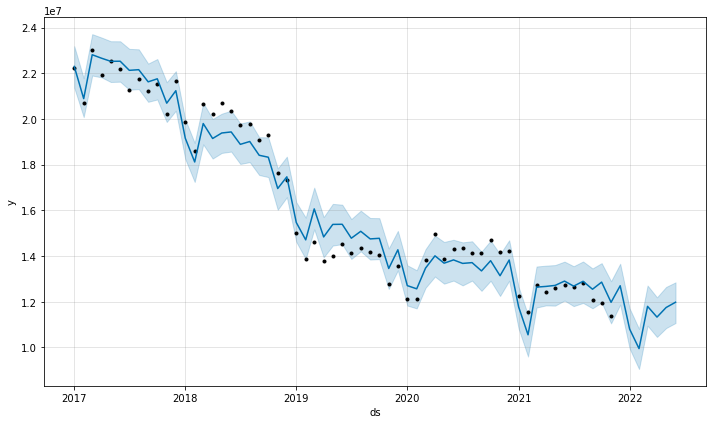

In [139]:
m_1.plot(forecast_1);

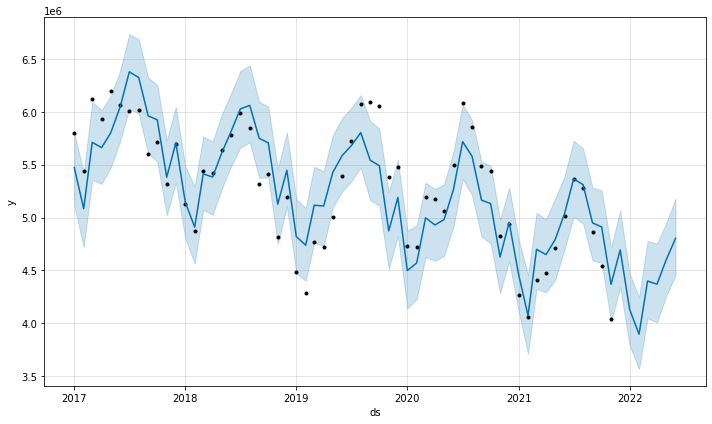

In [140]:
m_2.plot(forecast_2);

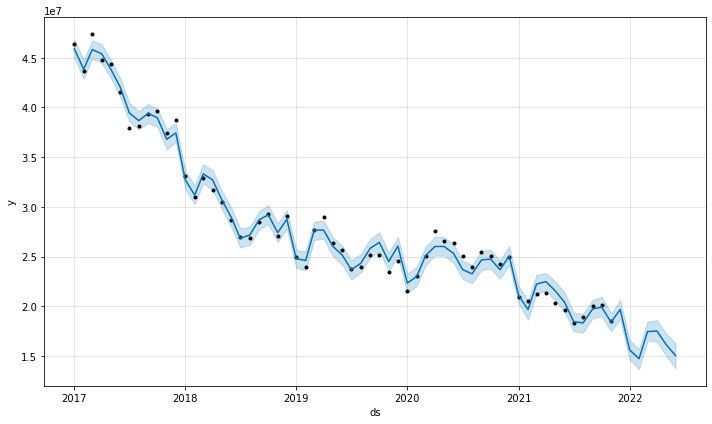

In [141]:
m_3.plot(forecast_3);

In [142]:
# Смотрим на ошибки модели (средняя абсолютная ошибка)
from sklearn.metrics import mean_absolute_error

error_forecast_1 = mean_absolute_error(forecast_1['yhat'].tail(7), test_1['y'])
error_forecast_2 = mean_absolute_error(forecast_2['yhat'].tail(7), test_2['y'])
error_forecast_3 = mean_absolute_error(forecast_3['yhat'].tail(7), test_3['y'])

error_forecast_1, error_forecast_2, error_forecast_3

(1127107.480266283, 699427.8254766884, 983049.301737204)

In [143]:
# Смотрим на ошибки модели (средняя абсолютная ошибка в процентах)

modul_dif_1 = np.abs(forecast_1.tail(7).reset_index()['yhat'] - test_1.reset_index()['y'])
dif_percent_1 = np.mean(modul_dif_1/test_1.reset_index()['y'])*100

modul_dif_2 = np.abs(forecast_2.tail(7).reset_index()['yhat'] - test_2.reset_index()['y'])
dif_percent_2 = np.mean(modul_dif_2/test_2.reset_index()['y'])*100

modul_dif_3 = np.abs(forecast_3.tail(7).reset_index()['yhat'] - test_3.reset_index()['y'])
dif_percent_3 = np.mean(modul_dif_3/test_3.reset_index()['y'])*100

dif_percent_1, dif_percent_2, dif_percent_3

(10.78993332191176, 18.899751794510205, 5.682964553464715)

Так как средняя абсолютная ошибка оказалась довольно высокой, то необходимо подобрать параметры для повышения точности прогноза

Смотрим на сезонности

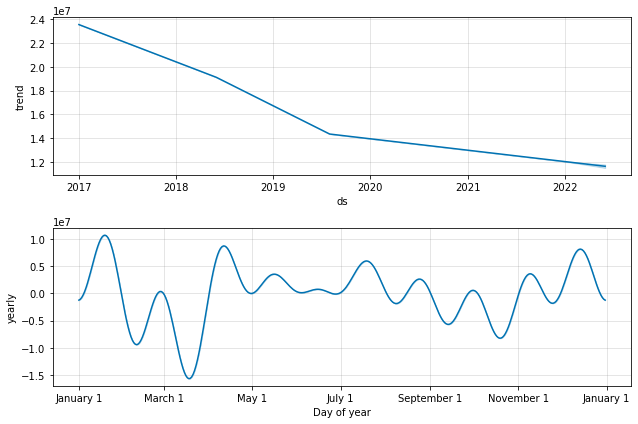

In [144]:
m_1.plot_components(forecast_1);

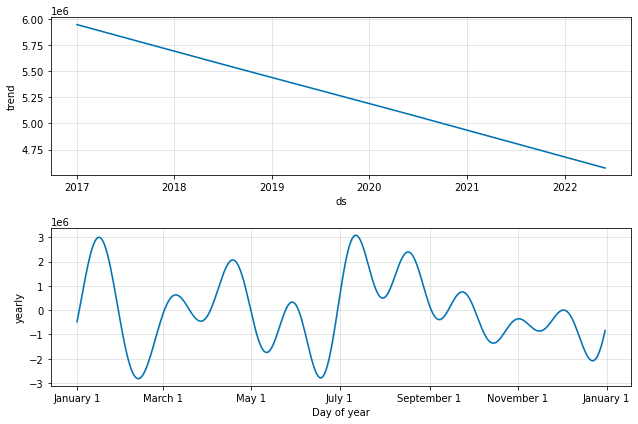

In [145]:
m_2.plot_components(forecast_2);

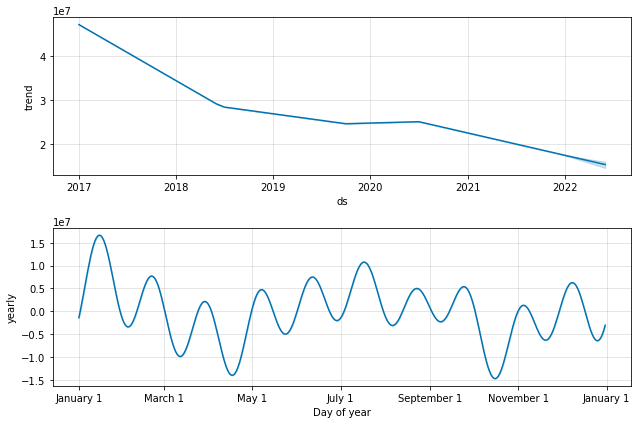

In [146]:
m_3.plot_components(forecast_3);

Так как данные есть только за каждый месяц, без разбивки по дням, то необходимо дообучить модель, убрав годовую сезонность

In [147]:
m_1 = Prophet(growth='linear', changepoint_prior_scale=0.1, yearly_seasonality=False)

months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
for i, month in enumerate(months):
    train_1[month] = (train_1['ds'].dt.month == i + 1).values.astype('float')
    m_1.add_regressor(month)
    
m_1.fit(train_1)

m_2 = Prophet(growth='linear', changepoint_prior_scale=0.5, yearly_seasonality=False)

months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
for i, month in enumerate(months):
    train_2[month] = (train_2['ds'].dt.month == i + 1).values.astype('float')
    m_2.add_regressor(month)
    
m_2.fit(train_2)   


m_3 = Prophet(growth='linear', yearly_seasonality=False)

months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
for i, month in enumerate(months):
    train_3[month] = (train_3['ds'].dt.month == i + 1).values.astype('float')
    m_3.add_regressor(month)
    
m_3.fit(train_3)   



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 Смотрим на ошибки модели после дополнения

In [148]:
forecast_1 = m_1.predict(future)
forecast_2 = m_2.predict(future)
forecast_3 = m_3.predict(future)

In [60]:
# Смотрим на ошибки модели (средняя абсолютная ошибка)
error_forecast_1 = mean_absolute_error(forecast_1['yhat'].tail(7), test_1['y'])
error_forecast_2 = mean_absolute_error(forecast_2['yhat'].tail(7), test_2['y'])
error_forecast_3 = mean_absolute_error(forecast_3['yhat'].tail(7), test_3['y'])

error_forecast_1, error_forecast_2, error_forecast_3

(285610.9849572006, 162459.60396007108, 859839.5270342279)

In [61]:
# Смотрим на ошибки модели (средняя абсолютная ошибка в процентах)
modul_dif_1 = np.abs(forecast_1.tail(7).reset_index()['yhat'] - test_1.reset_index()['y'])
dif_percent_1 = np.mean(modul_dif_1/test_1.reset_index()['y'])*100

modul_dif_2 = np.abs(forecast_2.tail(7).reset_index()['yhat'] - test_2.reset_index()['y'])
dif_percent_2 = np.mean(modul_dif_2/test_2.reset_index()['y'])*100

modul_dif_3 = np.abs(forecast_3.tail(7).reset_index()['yhat'] - test_3.reset_index()['y'])
dif_percent_3 = np.mean(modul_dif_3/test_3.reset_index()['y'])*100

dif_percent_1, dif_percent_2, dif_percent_3

(2.7590399281248215, 4.316308589644408, 4.945319899237077)

Ошибка стала знчительно меньше по всем регионам

Строим прогноз на 18 месяцев (07.2022 - 12.2023 гг)

In [62]:
m_1 = Prophet(growth='linear', changepoint_prior_scale=0.1, yearly_seasonality=False)

months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
for i, month in enumerate(months):
    region_1[month] = (region_1['ds'].dt.month == i + 1).values.astype('float')
    m_1.add_regressor(month)
    
m_1.fit(region_1)

m_2 = Prophet(growth='linear', changepoint_prior_scale=0.5, yearly_seasonality=False)

months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
for i, month in enumerate(months):
    region_2[month] = (region_2['ds'].dt.month == i + 1).values.astype('float')
    m_2.add_regressor(month)
    
m_2.fit(region_2)   


m_3 = Prophet(growth='linear', yearly_seasonality=False)

months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
for i, month in enumerate(months):
    region_3[month] = (region_3['ds'].dt.month == i + 1).values.astype('float')
    m_3.add_regressor(month)
    
m_3.fit(region_3)   

future_final = m_1.make_future_dataframe(18, freq = 'MS')

months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
for i, month in enumerate(months):
    future_final[month] = (future_final['ds'].dt.month == i + 1).values.astype('float')

forecast_1 = m_1.predict(future_final)
forecast_2 = m_2.predict(future_final)
forecast_3 = m_3.predict(future_final)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


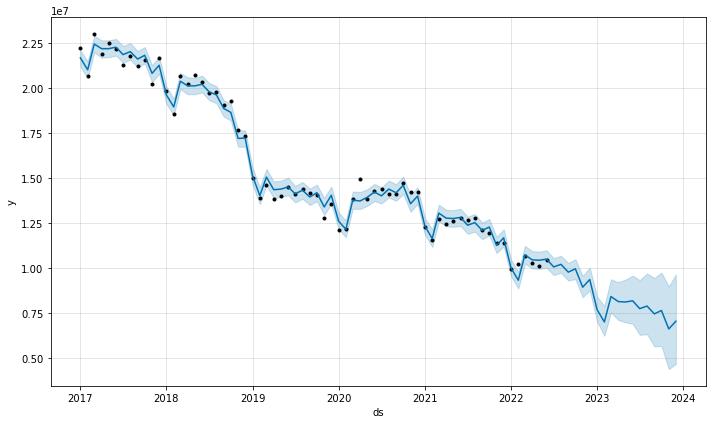

In [34]:
m_1.plot(forecast_1);

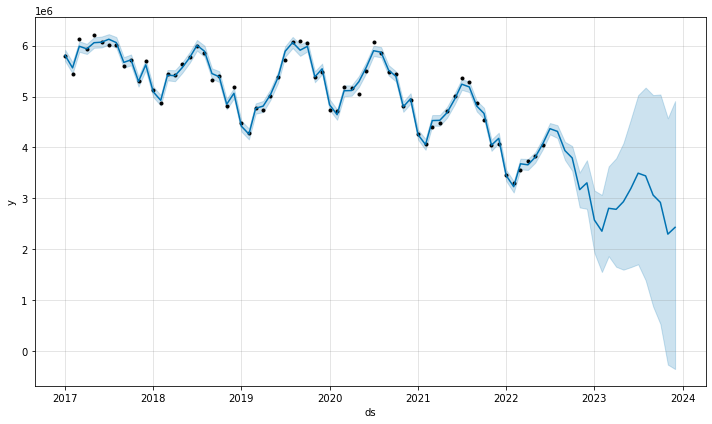

In [64]:
m_2.plot(forecast_2);

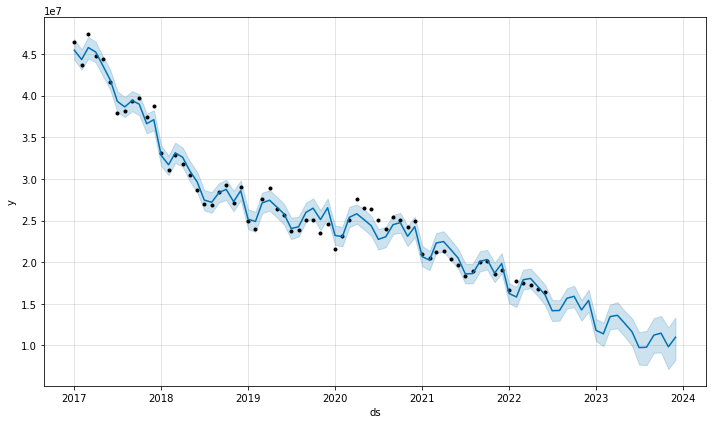

In [65]:
m_3.plot(forecast_3);

Посмотрим на прогноз по каждому региону и выгрузим в эксель

(yhat - прогноз, yhat_lower - нижняя граница ДИ для прогноза, yhat_upper - верхняя граница ДИ)

In [69]:
forecast_1[['ds', 'yhat', 'yhat_lower','yhat_upper']].tail(18)

,ds,yhat,yhat_lower,yhat_upper
66,2022-07-01,10053981.92,9586747.16,10541430.89
67,2022-08-01,10196277.25,9767489.42,10693843.90
68,2022-09-01,9763031.34,9251717.09,10270981.15
69,2022-10-01,9950791.29,9432116.59,10529592.29
70,2022-11-01,8925331.81,8365967.71,9516695.41
71,2022-12-01,9353321.48,8747904.70,10046332.18
72,2023-01-01,7680298.62,7011835.41,8503028.89
73,2023-02-01,6994211.89,6214170.82,7901662.62
74,2023-03-01,8406050.53,7560292.98,9400702.46
75,2023-04-01,8126580.37,7133149.90,9205412.00


In [71]:
forecast_2[['ds', 'yhat', 'yhat_lower','yhat_upper']].tail(18)

,ds,yhat,yhat_lower,yhat_upper
66,2022-07-01,4369136.09,4258270.74,4480412.42
67,2022-08-01,4315621.61,4185604.87,4437139.75
68,2022-09-01,3938966.98,3755476.33,4110471.15
69,2022-10-01,3795139.31,3543856.17,4028399.21
70,2022-11-01,3171853.81,2823312.39,3507277.00
71,2022-12-01,3306011.48,2795052.93,3749336.49
72,2023-01-01,2575021.64,1930819.11,3155928.57
73,2023-02-01,2356294.71,1554852.10,3066528.80
74,2023-03-01,2805907.26,1865550.76,3628129.41
75,2023-04-01,2785892.92,1657789.35,3788789.83


In [72]:
forecast_3[['ds', 'yhat', 'yhat_lower','yhat_upper']].tail(18)

,ds,yhat,yhat_lower,yhat_upper
66,2022-07-01,14166471.48,12914244.33,15465963.95
67,2022-08-01,14203010.13,12986995.30,15414034.22
68,2022-09-01,15663021.18,14455037.25,16864469.74
69,2022-10-01,15897204.16,14579089.52,17153845.49
70,2022-11-01,14257427.86,12984059.09,15452454.06
71,2022-12-01,15409888.86,14052578.82,16680552.22
72,2023-01-01,11816552.95,10524137.50,13183792.77
73,2023-02-01,11392133.63,9910364.44,12729602.72
74,2023-03-01,13458748.39,11931282.31,14908663.63
75,2023-04-01,13622946.00,12062813.59,15190753.82


In [73]:
# Выгружаем прогноз в эксель 
forecast_1.to_excel("./прогноз_рег_1.xlsx", sheet_name='Data', index=False, encoding="cp1251")
forecast_2.to_excel("./прогноз_рег_2.xlsx", sheet_name='Data', index=False, encoding="cp1251")
forecast_3.to_excel("./прогноз_рег_3.xlsx", sheet_name='Data', index=False, encoding="cp1251")